In [100]:
from datetime import timedelta
import datetime
import time

import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import scipy
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler



# Import dataset

In [101]:
turbine = 'T11'
path_dataset = f'../dataset/df_turbine_{turbine}.json'

## dataset

In [102]:
df = pd.read_json(path_dataset)
df.set_index('timestamp', inplace=True)
df.sort_index(ascending=True,inplace=True)
df.head()

,turbine_id,grd_prod_pwr_min,gen_rpm_avg,blds_pitchangle_max,grd_prod_pwr_avg,amb_winddir_abs_avg,gen_bear_temp_avg,amb_windspeed_min,grd_prod_reactpwr_max,grd_prod_curphse1_avg,...,grd_prod_voltphse1_avg,grd_prod_psblepwr_std,grd_prod_cosphi_avg,prod_latestavg_actpwrgen0,prod_latestavg_actpwrgen1,prod_latestavg_actpwrgen2,rtr_rpm_std,component,remarks,failure
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,T11,154.100,1270.900,0.900,246.100,199.100,42.000,2.600,-72.500,197.000,...,400.700,51.700,0.900,0.000,41059.000,0.000,0.200,None,None,0
2016-01-01 00:10:00,T11,191.300,1303.600,-0.800,304.700,207.500,43.000,1.700,-76.800,245.000,...,400.400,54.800,1.000,0.000,50808.000,0.000,0.400,None,None,0
2016-01-01 00:20:00,T11,211.300,1344.300,-1.300,364.200,190.500,43.000,1.500,-33.700,292.300,...,399.800,50.200,1.000,0.000,60667.000,0.000,0.200,None,None,0
2016-01-01 00:30:00,T11,316.500,1377.500,0.300,465.000,214.600,43.000,2.700,-88.700,374.600,...,399.600,60.100,1.000,0.000,77486.000,0.000,0.400,None,None,0
2016-01-01 00:40:00,T11,204.300,1396.200,-1.000,404.600,212.100,43.000,1.700,-91.100,327.700,...,398.800,99.000,1.000,0.000,67378.000,0.000,0.600,None,None,0


## check number of failures

In [103]:
df.loc[~df['component'].isnull(),['turbine_id','component', 'remarks','failure']]


,turbine_id,component,remarks,failure
timestamp,,,,
2016-03-03 19:00:00,T11,GENERATOR,Electric circuit error in generator,1
2016-10-17 17:44:00,T11,HYDRAULIC_GROUP,Hydraulic group error in the brake circuit,1
2017-04-26 18:06:00,T11,HYDRAULIC_GROUP,Hydraulic group error in the brake circuit,1


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 87251 entries, 2016-01-01 00:00:00 to 2017-09-01 00:00:00
Data columns (total 85 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   turbine_id                   87251 non-null  object 
 1   grd_prod_pwr_min             87248 non-null  float64
 2   gen_rpm_avg                  87248 non-null  float64
 3   blds_pitchangle_max          87248 non-null  float64
 4   grd_prod_pwr_avg             87248 non-null  float64
 5   amb_winddir_abs_avg          87248 non-null  float64
 6   gen_bear_temp_avg            87247 non-null  float64
 7   amb_windspeed_min            87248 non-null  float64
 8   grd_prod_reactpwr_max        87248 non-null  float64
 9   grd_prod_curphse1_avg        87248 non-null  float64
 10  grd_prod_pwr_max             87248 non-null  float64
 11  grd_prod_pwr_std             87248 non-null  float64
 12  blds_pitchangle_min          87248 non-

In [105]:
datatypes = pd.DataFrame(df.dtypes, columns=['dtypes'])
datatypes['dtypes'].value_counts()

float64    81
object      3
int64       1
Name: dtypes, dtype: int64

In [106]:
datatypes[datatypes['dtypes'] == 'int64']

,dtypes
failure,int64


There is only 3 columns as string

In [107]:
tags_float = datatypes[datatypes['dtypes'] == 'float'].index.tolist()
tags_str = datatypes[datatypes['dtypes'] == 'object'].index.tolist()

## Check Duplicates

In [110]:
df[df.index.duplicated(keep=False)]

,turbine_id,grd_prod_pwr_min,gen_rpm_avg,blds_pitchangle_max,grd_prod_pwr_avg,amb_winddir_abs_avg,gen_bear_temp_avg,amb_windspeed_min,grd_prod_reactpwr_max,grd_prod_curphse1_avg,...,grd_prod_voltphse1_avg,grd_prod_psblepwr_std,grd_prod_cosphi_avg,prod_latestavg_actpwrgen0,prod_latestavg_actpwrgen1,prod_latestavg_actpwrgen2,rtr_rpm_std,component,remarks,failure
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-10-30 02:00:00,T11,1198.100,1672.500,9.600,1875.200,93.600,68.000,1.900,-211.500,1570.800,...,400.100,206.300,1.000,0.000,312325.000,0.000,0.200,None,None,0
2016-10-30 02:00:00,T11,1130.100,1671.000,5.600,1806.900,93.000,73.000,2.000,-198.500,1517.100,...,398.300,195.000,1.000,0.000,301192.000,0.000,0.100,None,None,0
2016-10-30 02:10:00,T11,1233.700,1675.800,7.600,1870.300,112.900,73.000,3.800,-201.100,1567.200,...,399.300,185.900,1.000,0.000,311628.000,0.000,0.200,None,None,0
2016-10-30 02:10:00,T11,1452.500,1676.200,10.500,1944.200,106.100,69.000,4.100,-217.200,1633.700,...,398.300,121.800,1.000,0.000,324005.000,0.000,0.200,None,None,0
2016-10-30 02:20:00,T11,1331.600,1669.900,7.300,1826.600,93.700,74.000,3.000,-204.600,1526.600,...,400.600,199.400,1.000,0.000,304970.000,0.000,0.200,None,None,0
2016-10-30 02:20:00,T11,1364.300,1677.500,6.400,1948.800,82.000,70.000,3.300,-217.400,1638.900,...,398.100,121.200,1.000,0.000,324852.000,0.000,0.200,None,None,0
2016-10-30 02:30:00,T11,1914.300,1681.200,8.800,1999.900,110.500,71.000,3.100,-217.000,1681.100,...,398.200,7.000,1.000,0.000,333279.000,0.000,0.100,None,None,0
2016-10-30 02:30:00,T11,1096.000,1667.900,5.100,1776.900,99.300,74.000,2.700,-201.600,1485.500,...,400.100,252.500,1.000,0.000,296456.000,0.000,0.200,None,None,0
2016-10-30 02:40:00,T11,963.900,1670.000,7.000,1769.400,106.000,72.000,4.100,-206.600,1489.500,...,397.900,267.100,1.000,0.000,294792.000,0.000,0.200,None,None,0


In [119]:
print(f'before {df.shape}')
df = df[~df.index.duplicated(keep='first')]
print(f'after {df.shape}')


before (87245, 85)
after (87245, 85)


## Splitting Training and Test Set

In [120]:
training_set = df.loc['2016-01-01':'2016-12-31'].copy()
test_set =  df.loc['2017-01-01':'2017-12-31'].copy()

# Analyse Training Set

There is many many columns to analyse, so in order to make it simple and reduce the dataset 

# Numerical Variables

## Check for Missing Data

In [121]:
pct_null = df.isnull().sum() /df.shape[0]
pct_null.sort_values(ascending=False)


component                 1.000
remarks                   1.000
gen_bear_temp_avg         0.000
grd_prod_cosphi_avg       0.000
rtr_rpm_std               0.000
                           ... 
grd_busbar_temp_avg       0.000
grd_prod_psblepwr_min     0.000
hvtrafo_phase2_temp_avg   0.000
turbine_id                0.000
failure                   0.000
Length: 85, dtype: float64

The columns don't have high percentage of null data

## Check for Inf values

In [122]:
# check for infinite values
d = ~np.isfinite(training_set[tags_float])
d.sum()

grd_prod_pwr_min             2
gen_rpm_avg                  2
blds_pitchangle_max          2
grd_prod_pwr_avg             2
amb_winddir_abs_avg          2
                            ..
grd_prod_cosphi_avg          2
prod_latestavg_actpwrgen0    2
prod_latestavg_actpwrgen1    2
prod_latestavg_actpwrgen2    2
rtr_rpm_std                  2
Length: 81, dtype: int64

In [123]:
# replace inf values
training_set[tags_float] = training_set[tags_float].replace([np.inf, -np.inf], np.nan)

## Fillna

In [124]:
# fillna
training_set[tags_float] = training_set[tags_float].fillna(method='backfill')

In [125]:
pct_null = training_set[tags_float].isnull().sum() /training_set[tags_float].shape[0]
pct_null.sort_values(ascending=False)


grd_prod_pwr_min         0.000
nac_temp_avg             0.000
gen_bear2_temp_avg       0.000
gen_rpm_max              0.000
amb_windspeed_est_avg    0.000
                          ... 
amb_windspeed_avg        0.000
grd_prod_voltphse3_avg   0.000
grd_busbar_temp_avg      0.000
grd_prod_psblepwr_min    0.000
rtr_rpm_std              0.000
Length: 81, dtype: float64

## Check for tags with high correlation and drop one of them - VIF

In [28]:

print(f'Started at --- {str(datetime.datetime.now() - timedelta(hours=3))}')
start_time = time.time()

# Scaling first to ease the calculations
scaler = StandardScaler()

X = training_set[tags_float].copy()
X_scaled = scaler.fit_transform(X)

# Keep DataFrame indexes ---------------------------------------------------------
X_scaled = pd.DataFrame(data=X_scaled, columns=X.columns, index=X.index)

vif_factor_threshold = 5
iter = 1
span_tags_to_remove = 1

while iter > 0:
    print(f'\r{len(X_scaled.columns)}', end="")

    vif = pd.DataFrame()
    vif["features"] = X_scaled.columns
    vif["VIF Factor"] = [variance_inflation_factor(X_scaled.values, i) for i in range(X_scaled.shape[1])]
    vif_high = vif.sort_values(by=['VIF Factor'], ascending=False)

    if vif_high[vif_high['VIF Factor'] > vif_factor_threshold].shape[0] == 0:
        iter = 0
    else:
        tag_name = vif_high[vif_high['VIF Factor'] > vif_factor_threshold].iloc[:span_tags_to_remove]['features']
        cols = X_scaled.columns.tolist()
        for t in tag_name:
            cols.remove(t)
        X_scaled = X_scaled[cols].copy()

execution = "--- %s minutes ---" + str(round((time.time() - start_time)/60,2))
print(f'Ended at --- {str(datetime.datetime.now() - timedelta(hours=3))}')
print(f'duration: {execution}')

display(vif_high)

Started at --- 2021-11-01 16:40:45.225631
81

C:\Users\rhamacherhay\Anaconda3\envs\hamacher_env\lib\site-packages\statsmodels\regression\linear_model.py:1740: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


21Ended at --- 2021-11-01 17:15:55.517978
duration: --- %s minutes ---35.17


,features,VIF Factor
14,amb_windspeed_max,4.317929
4,amb_windspeed_std,4.216420
16,blds_pitchangle_std,4.030760
17,gear_oil_temp_avg,3.867302
20,rtr_rpm_std,3.730441
10,blds_pitchangle_avg,3.250593
12,hyd_oil_temp_avg,3.003931
18,grd_prod_cosphi_avg,2.946206
9,nac_direction_avg,2.944322
0,amb_winddir_abs_avg,2.815782


In [179]:
vif_filename = f'../output_EDA/vif_high_{turbine}.json'
vif_high.to_json(vif_filename)

In [180]:
vif_high = pd.read_json(vif_filename)
vif_high

,features,VIF Factor
14,amb_windspeed_max,4.318
4,amb_windspeed_std,4.216
16,blds_pitchangle_std,4.031
17,gear_oil_temp_avg,3.867
20,rtr_rpm_std,3.730
10,blds_pitchangle_avg,3.251
12,hyd_oil_temp_avg,3.004
18,grd_prod_cosphi_avg,2.946
9,nac_direction_avg,2.944
0,amb_winddir_abs_avg,2.816


In [127]:
print(f'Frmo 80 columns noe we have {vif_high.shape[0]}')

tags_float_red = vif_high['features'].values
training_set_red = training_set[tags_float_red]
training_set_red

Frmo 80 columns noe we have 21


,amb_windspeed_max,amb_windspeed_std,blds_pitchangle_std,gear_oil_temp_avg,rtr_rpm_std,blds_pitchangle_avg,hyd_oil_temp_avg,grd_prod_cosphi_avg,nac_direction_avg,amb_winddir_abs_avg,...,prod_latestavg_reactpwrgen0,amb_windspeed_min,grd_prod_reactpwr_min,cont_hub_temp_avg,grd_prod_psbleind_std,grd_prod_voltphse2_avg,amb_winddir_relative_avg,grd_prod_freq_avg,prod_latestavg_reactpwrgen2,prod_latestavg_actpwrgen2
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,8.600,0.700,0.300,48.000,0.200,-1.400,30.000,0.900,206.900,199.100,...,0.000,2.600,-100.100,28.000,56.500,398.200,-7.800,50.000,0.000,0.000
2016-01-01 00:10:00,11.100,0.900,0.400,48.000,0.400,-1.700,30.000,1.000,206.900,207.500,...,0.000,1.700,-102.000,28.000,5.800,398.200,0.600,50.000,0.000,0.000
2016-01-01 00:20:00,9.900,0.800,0.200,49.000,0.200,-1.900,30.000,1.000,206.900,190.500,...,0.000,1.500,-108.100,28.000,0.200,397.700,-16.500,50.000,0.000,0.000
2016-01-01 00:30:00,9.400,0.800,0.200,49.000,0.400,-2.000,30.000,1.000,206.900,214.600,...,0.000,2.700,-105.100,28.000,0.000,397.300,7.600,50.000,0.000,0.000
2016-01-01 00:40:00,11.600,0.900,0.300,50.000,0.600,-2.000,30.000,1.000,206.900,212.100,...,0.000,1.700,-106.100,28.000,1.700,396.700,5.200,50.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 23:10:00,12.400,1.100,0.100,54.000,0.400,-2.200,26.000,1.000,102.400,101.700,...,0.000,3.000,-125.200,23.000,0.000,396.100,-0.800,50.000,0.000,0.000
2016-12-31 23:20:00,19.400,1.300,0.200,55.000,0.400,-2.200,25.000,1.000,102.400,122.100,...,0.000,3.700,-131.100,23.000,0.000,395.800,19.700,50.000,0.000,0.000
2016-12-31 23:30:00,17.600,1.200,0.100,55.000,0.400,-2.200,25.000,1.000,102.400,89.800,...,0.000,3.700,-125.000,23.000,0.000,396.200,-12.600,50.000,0.000,0.000


### Check for low variance 

In [128]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
x = training_set_red.std(numeric_only=True).sort_values(ascending=True)
display(x)

tags_float_drop = x[x<=1].index
print('************* DROPPED TAGS *************')
display(tags_float_drop)

tags_float_red = x[x>1].index
training_set_red = training_set[tags_float_red]
print(training_set_red.shape)
training_set_red


prod_latestavg_actpwrgen2       0.000
prod_latestavg_reactpwrgen2     0.000
grd_prod_freq_avg               0.012
grd_prod_cosphi_avg             0.169
amb_windspeed_std               0.768
rtr_rpm_std                     0.969
amb_windspeed_min               1.007
grd_prod_voltphse2_avg          1.525
blds_pitchangle_std             4.089
cont_hub_temp_avg               5.377
gear_oil_temp_avg               6.411
amb_windspeed_max               7.368
hyd_oil_temp_avg                7.426
blds_pitchangle_avg            13.360
amb_winddir_relative_avg       31.175
nac_direction_avg              94.755
amb_winddir_abs_avg            95.079
grd_prod_psbleind_std          97.024
grd_prod_pwr_std              115.840
grd_prod_reactpwr_min         154.341
prod_latestavg_reactpwrgen0   416.055
dtype: float64

************* DROPPED TAGS *************


Index(['prod_latestavg_actpwrgen2', 'prod_latestavg_reactpwrgen2',
       'grd_prod_freq_avg', 'grd_prod_cosphi_avg', 'amb_windspeed_std',
       'rtr_rpm_std'],
      dtype='object')

(52442, 15)


,amb_windspeed_min,grd_prod_voltphse2_avg,blds_pitchangle_std,cont_hub_temp_avg,gear_oil_temp_avg,amb_windspeed_max,hyd_oil_temp_avg,blds_pitchangle_avg,amb_winddir_relative_avg,nac_direction_avg,amb_winddir_abs_avg,grd_prod_psbleind_std,grd_prod_pwr_std,grd_prod_reactpwr_min,prod_latestavg_reactpwrgen0
timestamp,,,,,,,,,,,,,,,
2016-01-01 00:00:00,2.600,398.200,0.300,28.000,48.000,8.600,30.000,-1.400,-7.800,206.900,199.100,56.500,51.800,-100.100,0.000
2016-01-01 00:10:00,1.700,398.200,0.400,28.000,48.000,11.100,30.000,-1.700,0.600,206.900,207.500,5.800,54.400,-102.000,0.000
2016-01-01 00:20:00,1.500,397.700,0.200,28.000,49.000,9.900,30.000,-1.900,-16.500,206.900,190.500,0.200,49.700,-108.100,0.000
2016-01-01 00:30:00,2.700,397.300,0.200,28.000,49.000,9.400,30.000,-2.000,7.600,206.900,214.600,0.000,59.500,-105.100,0.000
2016-01-01 00:40:00,1.700,396.700,0.300,28.000,50.000,11.600,30.000,-2.000,5.200,206.900,212.100,1.700,98.600,-106.100,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 23:10:00,3.000,396.100,0.100,23.000,54.000,12.400,26.000,-2.200,-0.800,102.400,101.700,0.000,153.900,-125.200,0.000
2016-12-31 23:20:00,3.700,395.800,0.200,23.000,55.000,19.400,25.000,-2.200,19.700,102.400,122.100,0.000,157.000,-131.100,0.000
2016-12-31 23:30:00,3.700,396.200,0.100,23.000,55.000,17.600,25.000,-2.200,-12.600,102.400,89.800,0.000,151.500,-125.000,0.000


### Check Different Types of Correlations

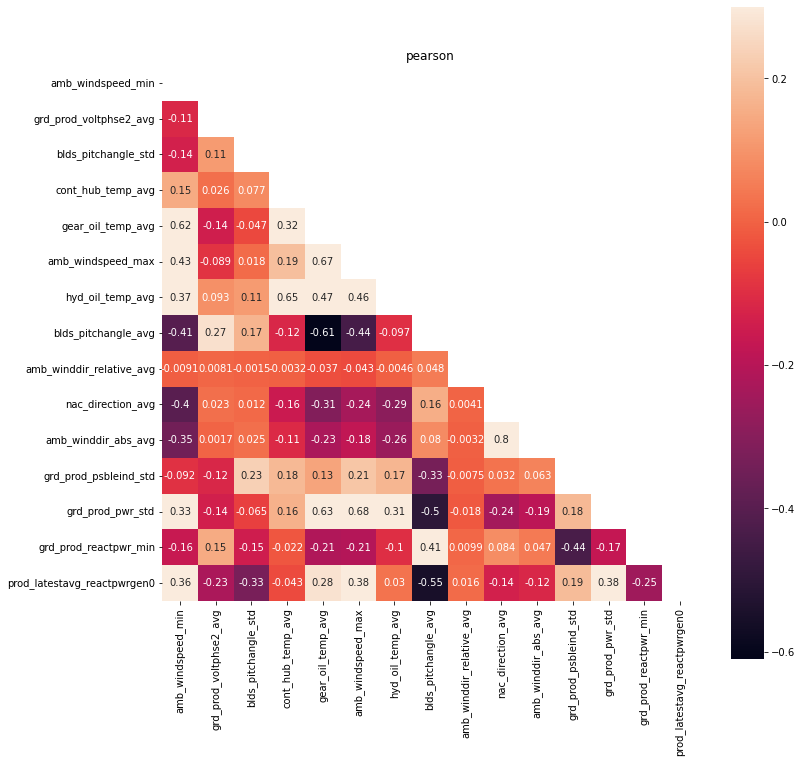

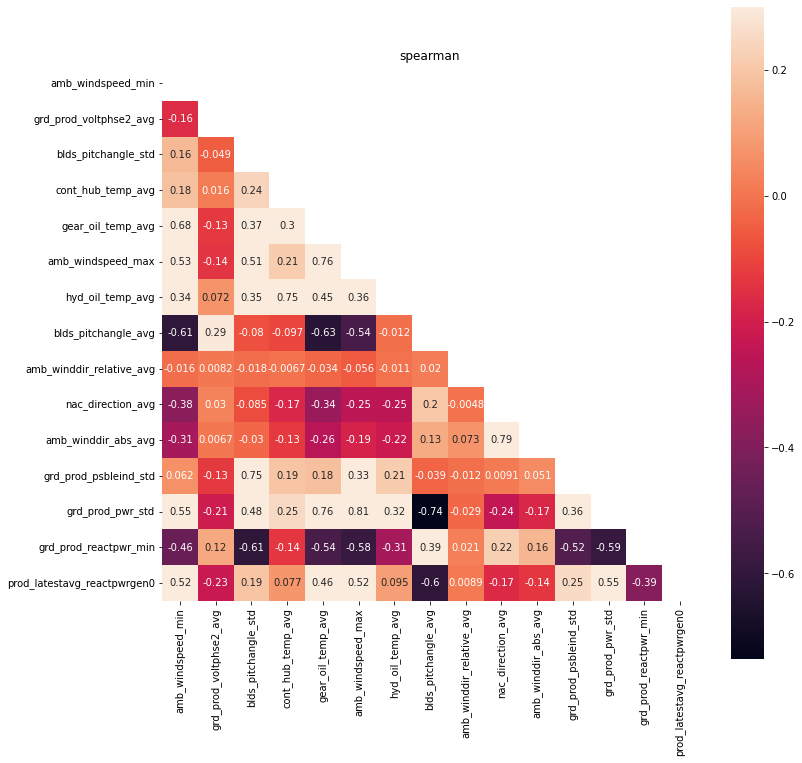

In [129]:
# Correlation

def plot_corr(df, method='pearson'):
    corr = df.corr(method=method)
    
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True

    f, ax = plt.subplots(figsize=(12, 12))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot=True)
    ax.set_title(f'{method}')


plot_corr(training_set_red, 'pearson')
plot_corr(training_set_red, 'spearman')

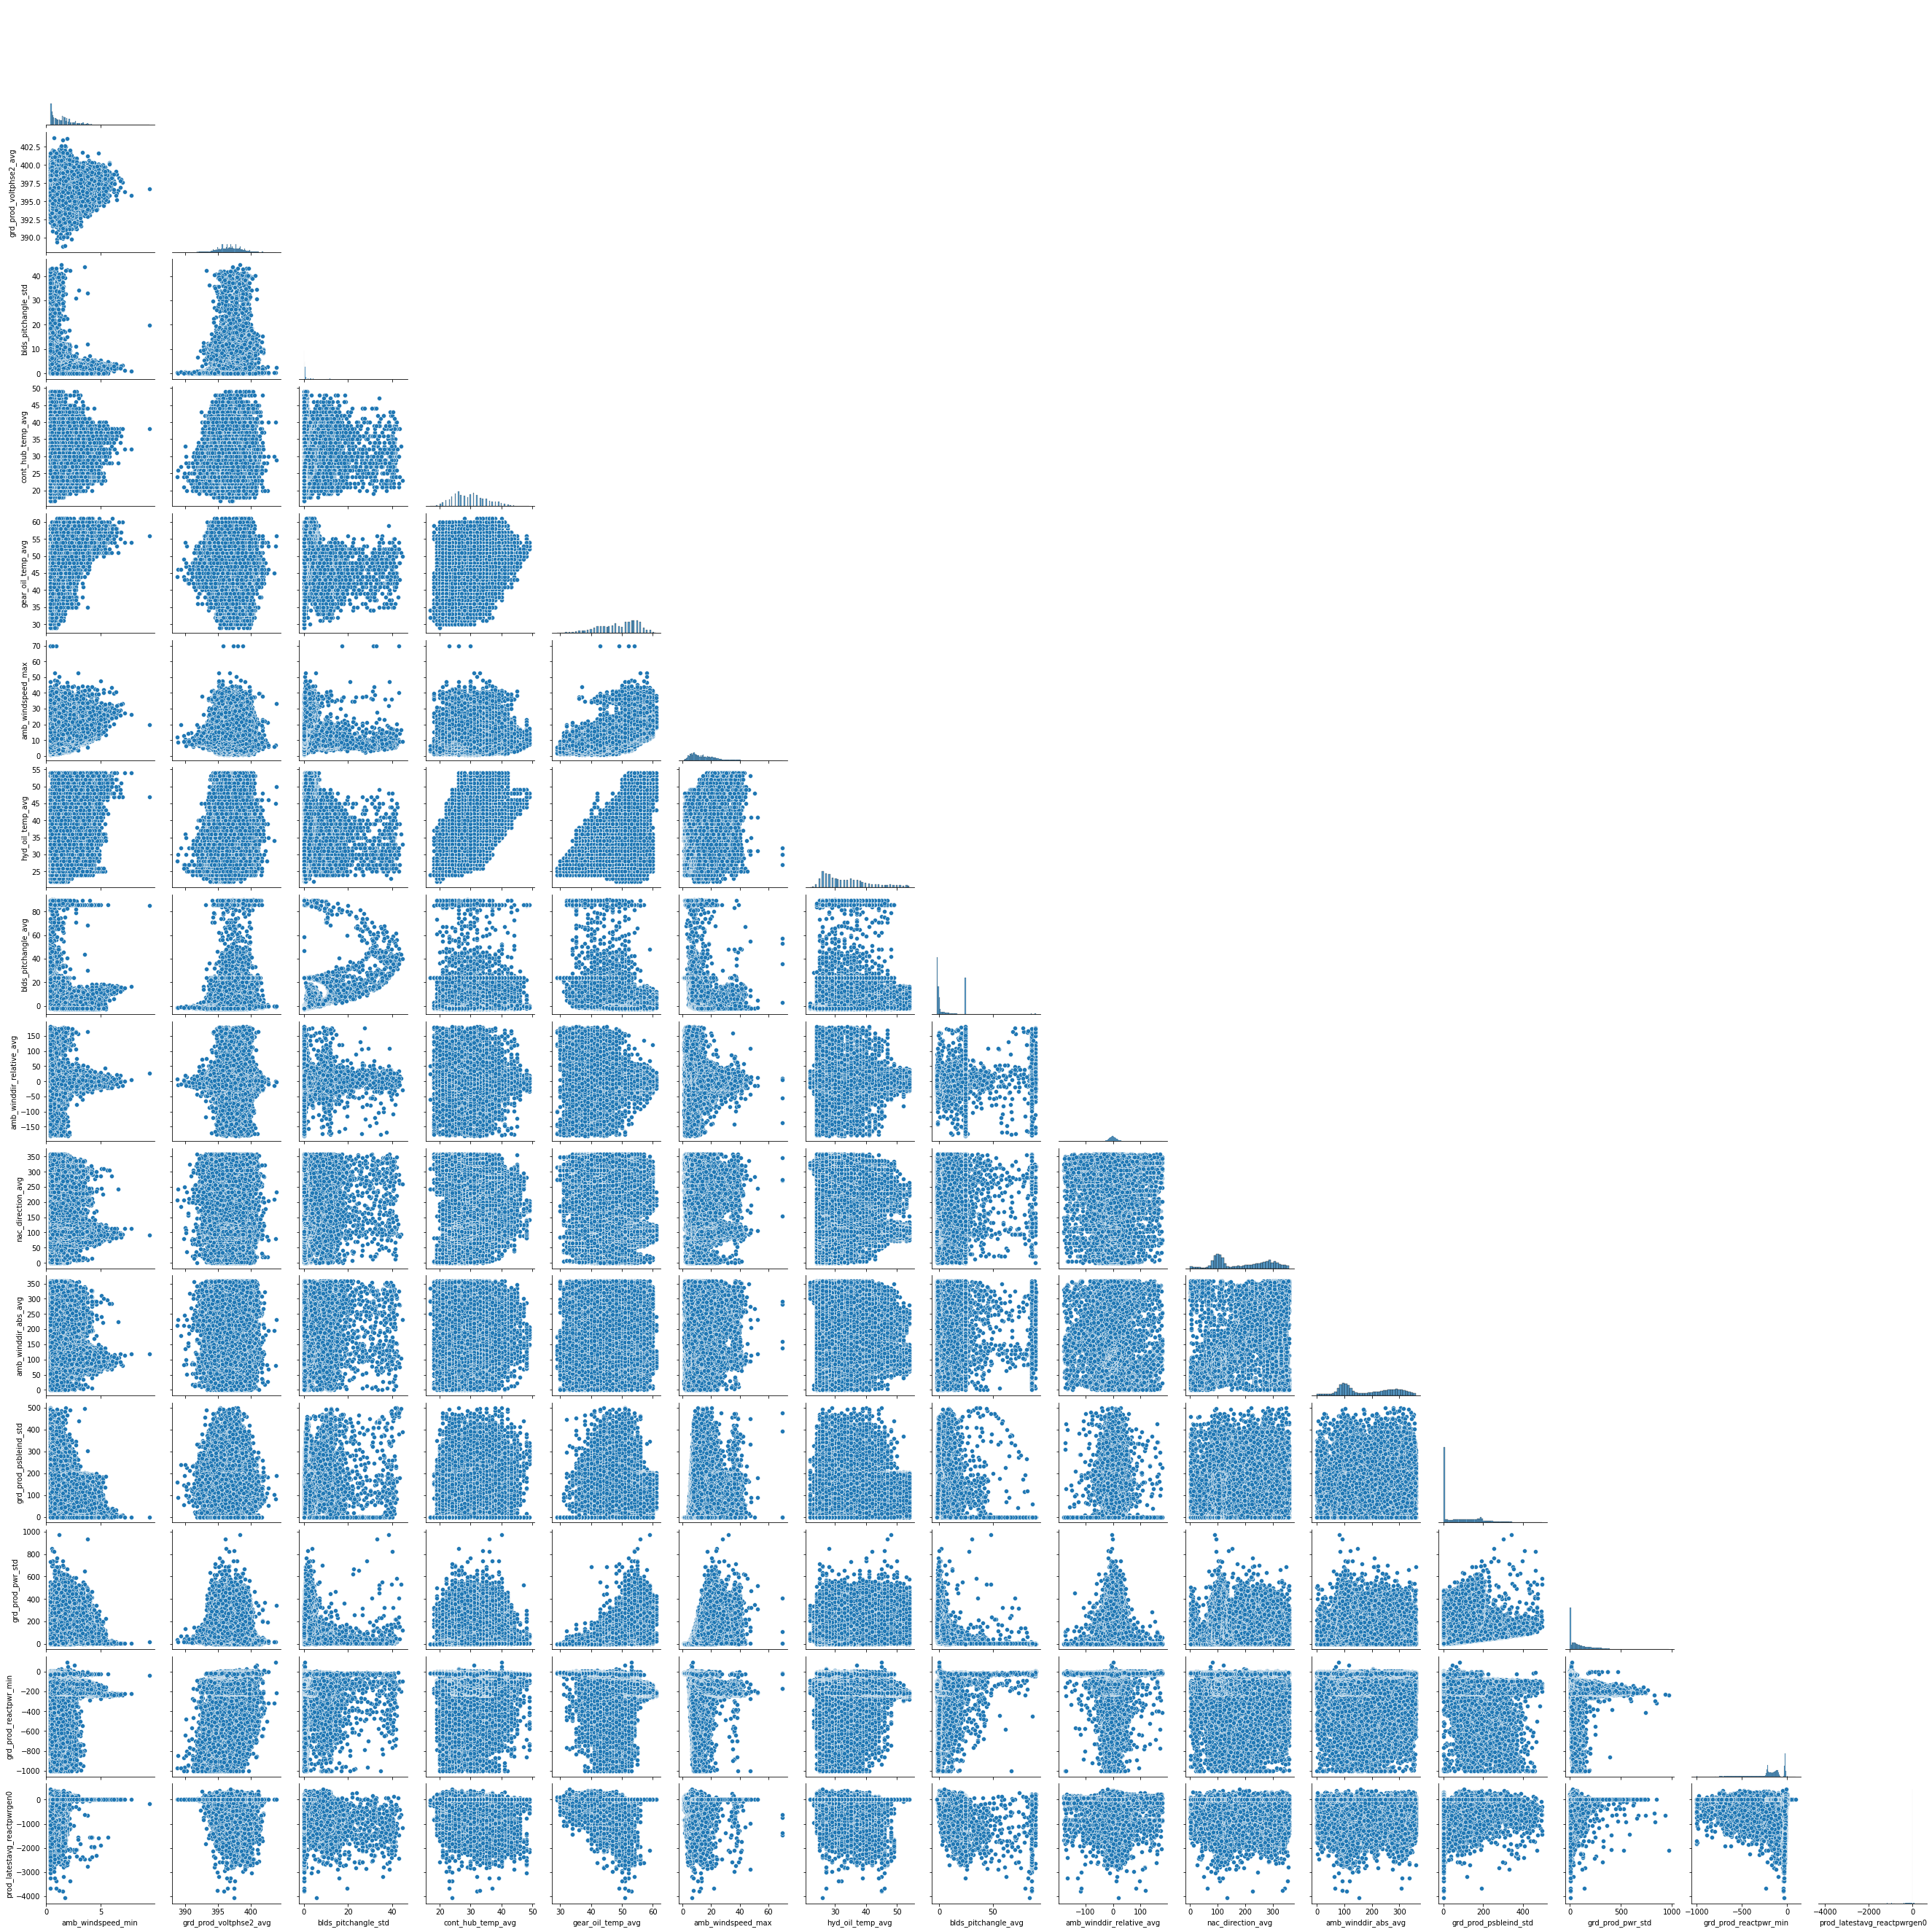

In [132]:
sns.pairplot(training_set_red, corner=True)

In [133]:
profile = ProfileReport(training_set_red, title="Pandas Profiling Report", explorative=True)
profile.to_file(f'../output_EDA/{turbine}_pandas_profiling_training.html')
print('ok')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 23.78it/s]

ok


### Drop high correlated variables

In [172]:


df_float_red = training_set_red.copy()

print(f'before {df_float_red.shape}')
names = ['not empty']

while names != []:
    corr = df_float_red.corr(method='spearman')
    names = []

    for name, values in corr.iteritems():
        high_corr = values[values.abs() > 0.7]
        cols = high_corr.index.tolist()
        cols.remove(name)
        if cols != []:
            names = names + [name]

    if names != []:
        corr_sum = corr.abs().sum(axis=0)
        high_corr_sum = corr_sum[names]
        drop_col = high_corr_sum[high_corr_sum==high_corr_sum.max()].index

        df_float_red = df_float_red.drop(columns=drop_col)


print(f'after {df_float_red.shape}')

# for name, values in training_set_red[x.index].iteritems():
#     pd.DataFrame(values).plot(title=name, style='.')
#     plt.show()

before (52442, 15)
after (52442, 10)


In [173]:
training_set_red = df_float_red.copy()
training_set_red

,amb_windspeed_min,grd_prod_voltphse2_avg,cont_hub_temp_avg,amb_windspeed_max,blds_pitchangle_avg,amb_winddir_relative_avg,amb_winddir_abs_avg,grd_prod_psbleind_std,grd_prod_reactpwr_min,prod_latestavg_reactpwrgen0
timestamp,,,,,,,,,,
2016-01-01 00:00:00,2.600,398.200,28.000,8.600,-1.400,-7.800,199.100,56.500,-100.100,0.000
2016-01-01 00:10:00,1.700,398.200,28.000,11.100,-1.700,0.600,207.500,5.800,-102.000,0.000
2016-01-01 00:20:00,1.500,397.700,28.000,9.900,-1.900,-16.500,190.500,0.200,-108.100,0.000
2016-01-01 00:30:00,2.700,397.300,28.000,9.400,-2.000,7.600,214.600,0.000,-105.100,0.000
2016-01-01 00:40:00,1.700,396.700,28.000,11.600,-2.000,5.200,212.100,1.700,-106.100,0.000
...,...,...,...,...,...,...,...,...,...,...
2016-12-31 23:10:00,3.000,396.100,23.000,12.400,-2.200,-0.800,101.700,0.000,-125.200,0.000
2016-12-31 23:20:00,3.700,395.800,23.000,19.400,-2.200,19.700,122.100,0.000,-131.100,0.000
2016-12-31 23:30:00,3.700,396.200,23.000,17.600,-2.200,-12.600,89.800,0.000,-125.000,0.000


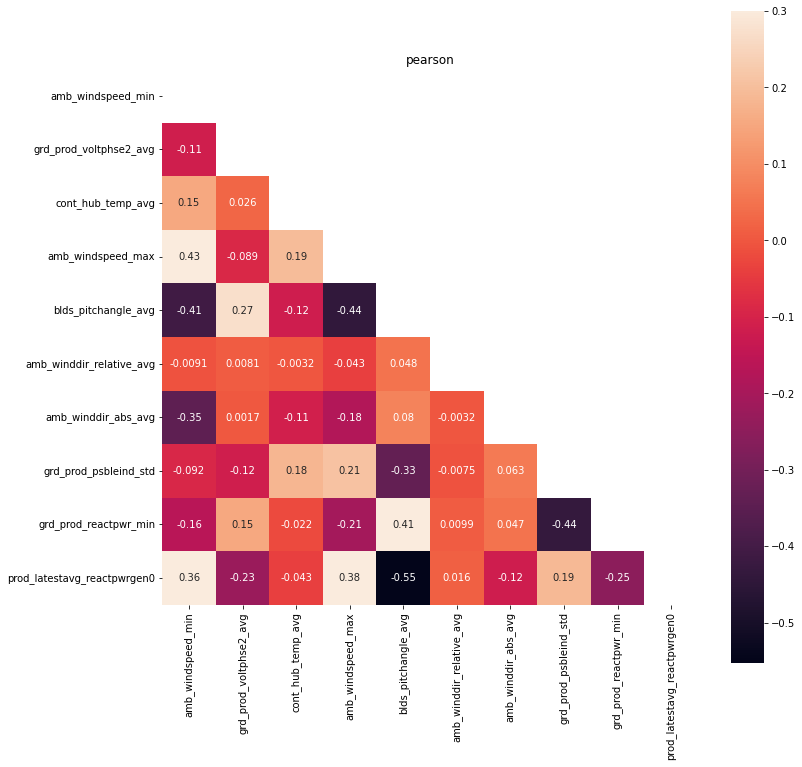

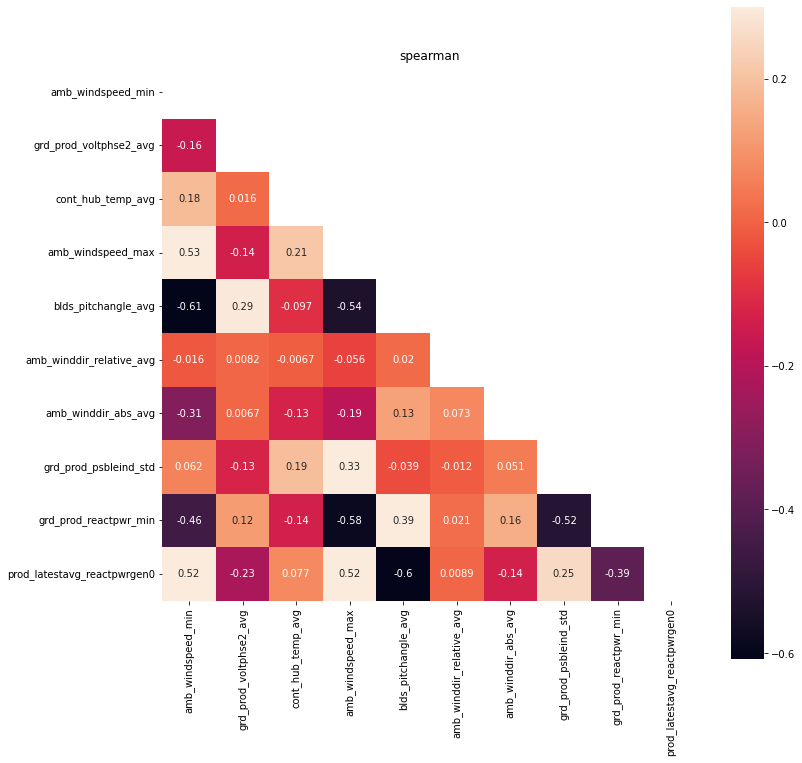

In [175]:
# Correlation

def plot_corr(df, method='pearson'):
    corr = df.corr(method=method)
    
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True

    f, ax = plt.subplots(figsize=(12, 12))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot=True)
    ax.set_title(f'{method}')


plot_corr(training_set_red, 'pearson')
plot_corr(training_set_red, 'spearman')

## Numerical Variable Distribution within failure 

## Temporal Analyses

# Proportion of Failures for Categorical Variables 

# Time between failures

# Conclusion

# Validation